# Bayesian Linear Regression

ValueError: 'y1' is not 1-dimensional

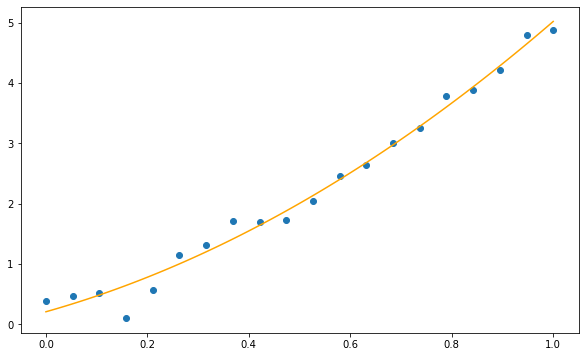

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
torch.manual_seed(42)
num_samples = 20
x = torch.linspace(0, 1, num_samples).unsqueeze(1)
y = 3 * x + 2 * x**2 + 0.2 * torch.randn(num_samples, 1)

# Define polynomial basis features
degree = 2
X_poly = torch.cat([x ** i for i in range(degree + 1)], dim=1)

# Closed-form solutions
X_T = X_poly.t()
X_T_X = torch.mm(X_T, X_poly)
X_T_y = torch.mm(X_T, y)

# MLE solution
theta_mle = torch.linalg.solve(X_T_X, X_T_y)

# MAP solution (assuming Gaussian priors)
lambda_identity = torch.eye(degree + 1)  # Identity matrix as the prior covariance
lambda_prior = 0.1
theta_map = torch.linalg.solve(X_T_X + lambda_prior * lambda_identity, X_T_y + lambda_prior * theta_mle)

# Full posterior (assuming Gaussian posterior)
posterior_covariance = torch.linalg.inv(X_T_X + lambda_prior * lambda_identity)
posterior_mean = torch.mm(posterior_covariance, X_T_y)

# Predictions
x_test = torch.linspace(0, 1, 100).unsqueeze(1)
X_test_poly = torch.cat([x_test ** i for i in range(degree + 1)], dim=1)

pred_mean_mle = torch.mm(X_test_poly, theta_mle)
pred_mean_map = torch.mm(X_test_poly, theta_map)
pred_mean_posterior = torch.mm(X_test_poly, posterior_mean)

# Uncertainties (aleatoric and epistemic)
pred_var_mle = torch.sum((torch.mm(X_test_poly, posterior_covariance) * X_test_poly), dim=1, keepdim=True).squeeze()
pred_std_mle = torch.sqrt(pred_var_mle).squeeze()

plt.figure(figsize=(10, 6))
plt.scatter(x.numpy(), y.numpy(), label='True Data')
plt.plot(x_test.numpy(), pred_mean_mle.numpy(), label='MLE Prediction', color='orange')

# Extract 1-dimensional values for x_test
x_test_1d = x_test.squeeze().numpy()

plt.fill_between(x_test_1d, (pred_mean_mle - 2 * pred_std_mle).numpy(), (pred_mean_mle + 2 * pred_std_mle).numpy(), color='orange', alpha=0.3, label='Epistemic Uncertainty')
plt.plot(x_test.numpy(), pred_mean_map.numpy(), label='MAP Prediction', color='green')
plt.plot(x_test.numpy(), pred_mean_posterior.numpy(), label='Full Posterior Prediction', color='blue')

plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Bayesian Linear Regression')
plt.legend()
plt.show()